In [14]:
import json
import pandas as pd

# Path to your JSON file
file_path = 'videos_metadata.json'

# Open the JSON file and load its content
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert the JSON data into a DataFrame
df = pd.DataFrame(data)

df=df[500:2500]



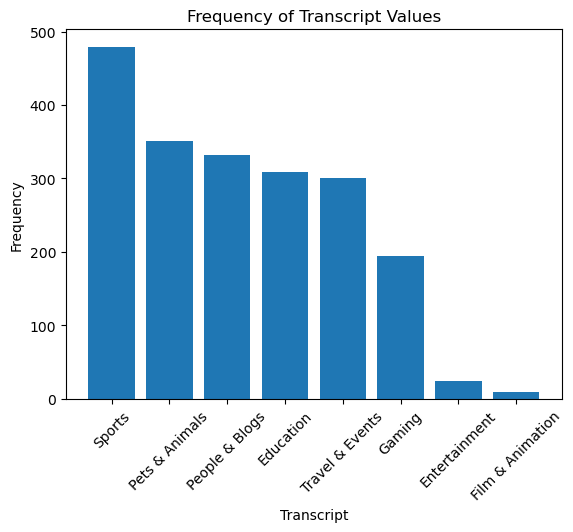

In [15]:
import matplotlib.pyplot as plt
# Count the occurrences of each unique value
transcript_counts = df['category'].value_counts()

# Create a bar chart
plt.bar(transcript_counts.index, transcript_counts.values)
plt.xlabel('Transcript')
plt.ylabel('Frequency')
plt.title('Frequency of Transcript Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [3]:
df.describe()

,duration_minutes,views,likes,like_to_view_ratio,comment_count
count,1000.000000,1.000000e+03,9.980000e+02,950.000000,986.000000
mean,8.360083,1.172124e+07,1.177520e+05,0.020006,4082.529412
std,3.278693,5.494826e+07,3.920619e+05,0.015559,12440.525872
min,3.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,5.466667,4.740380e+05,9.045500e+03,0.010600,406.500000
50%,8.483333,2.020556e+06,3.448750e+04,0.016400,1116.000000
75%,10.770833,5.791058e+06,9.909925e+04,0.024900,3316.250000
max,14.983333,9.510174e+08,6.215523e+06,0.201800,254851.000000


In [ ]:
df_tag=df['tags']
df=df.drop('tags',axis=1)
df.dropna()

print(df.duplicated().value_counts())
df =df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

df.dropna()

,video_id,title,description,category_id,duration_minutes,views,likes,dislikes,like_to_view_ratio,comment_count,published_at,channel_title,channel_id,video_url,category,transcript


In [19]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the Lemmatizer
lem = WordNetLemmatizer()
def clean_text(text):
    # Remove content in square brackets (e.g., [Music])
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize text into words
    words = word_tokenize(text)
    
    # Remove non-alphabetic tokens
    words = [word for word in words if word.isalpha()]
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization (considering verb form as in your example)
    words = [lem.lemmatize(word, "v") for word in words]
    
    # Join the cleaned tokens back into a string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

In [9]:
lst=[]
data=(list(df['transcript']))

for trans in data:
    if(len(str(trans))<15000 and len(str(trans))>10 ):
        trans=clean_text((str(trans)))
        lst.append(((trans)))    
print(len(lst))


592


In [10]:
df['transcript'].isna().sum()

346

In [11]:
df.shape

(943, 16)

In [12]:
# (df['transcript'].fillna(df['transcript'])).shape
df['transcript'] = df['transcript'].fillna(df['description']+df['title'])
print(df['transcript'].isna().sum())
data = df[['video_id', 'title', 'description', 'category_id', 'duration_minutes', 'category', 'transcript']]


0


In [ ]:




# Apply the text cleaning function to the dataset columns
data['title'] = data['title'].apply(clean_text)
data['description'] = data['description'].apply(clean_text)
data['transcript'] = data['transcript'].apply(clean_text)



In [27]:
# !pip install nltk

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Download stop words from nltk
nltk.download('stopwords')
nltk_stopwords = set(stopwords.words('english'))
# 
# Combine stop words from nltk and sklearn
stop_words = nltk_stopwords.union(ENGLISH_STOP_WORDS)

def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply to text fields
data['cleaned_title'] = data['title'].apply(remove_stop_words)
data['cleaned_description'] = data['description'].apply(remove_stop_words)
data['cleaned_transcript'] = data['transcript'].apply(remove_stop_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhupesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
def create_weighted_feature(row):
    title_weight = 0.8
    description_weight = 0.6
    transcript_weight = 0.4

    # Weighted concatenation of text features
    combined_text = (
        " ".join([row['cleaned_title']] * int(title_weight * 10)) + " " +
        " ".join([row['cleaned_description']] * int(description_weight * 10)) + " " +
        " ".join([row['cleaned_transcript']] * int(transcript_weight * 10))
    )
    return combined_text

# Apply the function
data['weighted_text'] = data.apply(create_weighted_feature, axis=1)


In [99]:
import gensim
from gensim.models import Word2Vec
import numpy as np
import pandas as pd


# Tokenize the cleaned text (split into words)
data['tokenized_text'] = data['weighted_text'].apply(lambda x: x.split())


In [100]:
token = (data['weighted_text'][756])
print(len(set(token)))
len(token)
token

30


'{\' \', \'s\', \'j\', \'i\', \'f\', \'h\', \'t\', \'e\', \'c\', \'p\', \'u\', \'}\', \'m\', \'b\', \'y\', \'g\', \'k\', \'r\', \'v\', \'"\', \'n\', \'l\', \'o\', \'{\', \',\', \'w\', \'a\', "\'", \'d\', \'x\'}'

In [ ]:
# Create the Word2Vec model
# We set the embedding size to 100 for simplicity, but you can increase this depending on your dataset
embedding_size =300  # You can adjust this depending on the complexity and size of the dataset
model = Word2Vec(sentences=data['tokenized_text'], vector_size=embedding_size, window=5, min_count=1)


# Generate document embeddings by averaging the word embeddings of all words in the document
def get_document_embedding(tokens, model, embedding_size=100):
    # Initialize a vector of zeros for the document embedding
    doc_vector = np.zeros(embedding_size)
    valid_word_count = 0

    for word in tokens:
        if word in model.wv:
            # Add the word vector to the document vector
            doc_vector += model.wv[word]
            valid_word_count += 1
    
    # If no valid words found, return a zero vector (or handle it as needed)
    if valid_word_count > 0:
        doc_vector /= valid_word_count  # Average the word vectors to get a document vector
    return doc_vector

# Apply the function to all videos to generate their document embeddings
data['document_embedding'] = data['tokenized_text'].apply(lambda x: get_document_embedding(x, model, embedding_size))

# Convert the document embeddings into a numpy array
X = np.array(data['document_embedding'].tolist())



In [72]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def get_nearest_neighbors(word, embeddings, word2vec_model, top_n=5):
    # Get the vector for the word
    word_vector = word2vec_model.wv[word]
    
    # Compute cosine similarity between the word vector and all embeddings
    similarities = cosine_similarity([word_vector], embeddings)
    
    # Get indices of top_n most similar words
    most_similar_idx = np.argsort(similarities[0])[::-1][:top_n]
    return most_similar_idx, similarities[0][most_similar_idx]

# Example: Get nearest neighbors for the word "apple"
word = 'sperm'
similar_words_idx, similarities = get_nearest_neighbors(word, X, model)

for idx, similarity in zip(similar_words_idx, similarities):
    print(f"Word: {data['video_id'][idx]}, Similarity: {similarity}")


KeyError: 3804

In [61]:
print(model.wv['car'])

[-0.58723474 -0.6078962  -1.1526897   0.08958887 -1.0437543   2.1278405
  0.37670663 -0.01280796 -2.1800096   1.1816373   0.6403074   1.4400257
 -1.1581893   0.4619207  -0.10247158  2.2953746   1.1047597  -0.4449496
  0.5420915   2.9839692  -1.040256    0.2953806  -1.1528801  -1.2730362
 -1.9899946  -0.27515724  0.30206475 -1.206257   -0.9872845  -0.26728174
  1.624871   -1.659412   -1.1773069   0.3985316  -1.2217352  -1.0182366
  0.47309056  2.383308    0.25623754 -0.7292533  -0.4249173  -2.1461508
 -1.255505    1.6766264   0.93750376  1.4790812  -0.6440928   0.8116355
 -0.6166122  -0.37690747  0.1806123   1.0836226  -0.51553833 -1.7109326
  1.9262403  -0.09725142 -0.13655406  2.0124876  -2.2069466   2.126593
  0.20996186 -0.38505113  0.559021   -0.14259839 -0.8225821  -0.5579345
 -1.1906989  -1.8373759  -1.6063107   0.35881603 -0.09557716 -1.1258453
 -0.63305354  0.8699226   1.6277984   0.6704522  -0.2841354  -1.212737
 -0.4583433   0.7276564  -1.049545   -1.9263519   2.197026    0.3

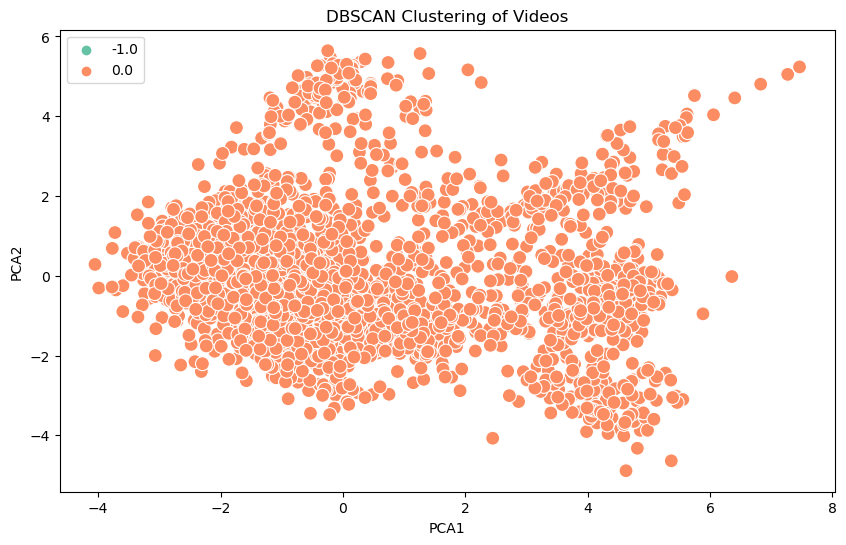

Cluster 0:
      video_id                                              title  cluster
0  aDRARW93DbY  mean explorer scout allow camp snoopy cartoon kid        0
1  sEL4ICu30zs                     skibidi toilet zombie universe        0
2  -IoTbcqgYKw  sahra nın orhun amcasından özel isteği esaret ...        0
3  F5ef8DoV4a0  godzilla vs submarine godzilla matthew broderi...        0
4  0ZgwrIlBf2U              bird box full movie trailer full hd p        0
Cluster -1:
         video_id                               title  cluster
29    aFB4EmRY-00                                           -1
544   2J-s-pXBX0E  behind scene cenicienta cinderella       -1
1390  bO5ThLmitbM                                           -1
1412  dFDzna8WlGc                                           -1
1415  r9WFysLUdC4                                           -1


In [58]:

# # Example: Using K-Means for clustering with Word2Vec embeddings
# from sklearn.cluster import KMeans

# num_clusters = 8# Number of clusters
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# data['cluster'] = kmeans.fit_predict(X)

# # Optional: Visualize the clusters using PCA (for 2D projection)
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import seaborn as sns

# pca = PCA(n_components=2)
# X_reduced = pca.fit_transform(X)

# pca_df = pd.DataFrame(X_reduced, columns=['PCA1', 'PCA2'])
# pca_df['cluster'] = data['cluster']

# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=100)
# plt.title("Word2Vec Clustering of Videos")
# plt.xlabel("PCA1")
# plt.ylabel("PCA2")
# plt.legend()
# plt.show()

# # Example: Show the cluster details
# for cluster_num in range(num_clusters):
#     print(f"Cluster {cluster_num}:")


#     cluster_data = data[data['cluster'] == cluster_num]
#     print(cluster_data[['video_id', 'title', 'cluster']].head())

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you already have the Word2Vec embeddings (X) and the cleaned text data (data)

# Step 1: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='cosine')  # Customize eps and min_samples
data['cluster'] = dbscan.fit_predict(X)  # X is the matrix of Word2Vec embeddings

# Step 2: Visualize the Clusters (optional)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(X_reduced, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = data['cluster']

# Visualizing the clusters using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=100)
plt.title("DBSCAN Clustering of Videos")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

# Step 3: Show the cluster details
for cluster_num in set(data['cluster']):
    print(f"Cluster {cluster_num}:")
    cluster_data = data[data['cluster'] == cluster_num]
    
    # Display video id and title for the top 5 videos in the cluster
    cluster_details = cluster_data[['video_id', 'title', 'cluster']].head(5)
    print(cluster_details)
    
   



In [31]:
cluster_data.shape

(5, 14)

In [26]:
# Example: Show the cluster details with corresponding video URL (limited to 5 videos per cluster)
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    
    # Get the data for the current cluster, but only select the top 5 videos
    cluster_data = data[data['cluster'] == cluster_num].head(5)
    
    # Print the video details (video_id, title, cluster)
    cluster_details = cluster_data[['video_id', 'title', 'cluster']]
    print(cluster_details)
    
    # For each video in the limited cluster data, get the corresponding video URL from df
    for video_id in cluster_data['video_id']:
        video_url = df[df['video_id'] == video_id]['video_url'].values
        if len(video_url) > 0:
            print(f"Video ID: {video_id} -> URL: {video_url[0]}")
        else:
            print(f"Video ID: {video_id} has no URL in df")
    print("\n")


Cluster 0:


KeyError: 'cluster'

In [25]:
def recommend_similar_videos(input_video_id, data, num_recommendations=5):
    # Step 1: Identify the cluster of the input video
    input_video_cluster = data[data['video_id'] == input_video_id]['cluster'].values
    
    if len(input_video_cluster) == 0:
        return f"Video ID {input_video_id} not found in the dataset."
    
    input_video_cluster = input_video_cluster[0]
    
    # Step 2: Get all videos in the same cluster (excluding the input video itself)
    clustered = data[data['cluster'] == input_video_cluster]
    clustered = clustered[clustered['video_id'] != input_video_id]
    
    # Step 3: Limit to the top N recommendations (default is 5)
    recommended_videos = clustered.head(num_recommendations)
    
    # Step 4: Fetch the video URLs for the recommended videos from the df DataFrame
    recommended_urls = []
    for video_id in recommended_videos['video_id']:
        video_url = df[df['video_id'] == video_id]['video_url'].values
        if len(video_url) > 0:
            recommended_urls.append((video_id, video_url[0]))
        else:
            recommended_urls.append((video_id, "URL not available"))
    
    return recommended_urls

# Example: Recommend videos similar to the video with ID 123
input_video_id = 'u0y2Wvc0Jm0'
recommended_videos = recommend_similar_videos(input_video_id, cluster_data)

# Display the recommended video IDs along with their URLs
for video_id, url in recommended_videos:
    print(f"Video ID: {video_id} -> URL: {url}")


ValueError: not enough values to unpack (expected 2, got 1)

In [17]:
data

,video_id,title,description,category_id,duration_minutes,category,transcript
0,aDRARW93DbY,mean explorer scout allow camp snoopy cartoon kid,kid prepare leave summer camp snoopy discover ...,1,4.083333,Film & Animation,ouch official beagle scout manual huh sort gui...
1,sEL4ICu30zs,skibidi toilet zombie universe,social media second channel monsteruplive disc...,1,3.566667,Film & Animation,rack brain wonder help us get know sure know w...
2,-IoTbcqgYKw,sahra nın orhun amcasından özel isteği esaret ...,join channel get access perk redemption air ka...,1,3.216667,Film & Animation,youre go okay right course dear dont worry hea...
3,F5ef8DoV4a0,godzilla vs submarine godzilla matthew broderi...,french nuclear test irradiate iguana giant mon...,1,9.500000,Film & Animation,careful give hand get get hear animal come gue...
4,0ZgwrIlBf2U,bird box full movie trailer full hd p,woman pair children blindfold make way dystopi...,1,3.100000,Film & Animation,please dont take feel sleep better oh ruff nev...
...,...,...,...,...,...,...,...
8596,u0y2Wvc0Jm0,fertilizationmedical animation sperm,fertilization fertilization occur sperm must e...,27,5.000000,Education,fertilization fertilization occur sperm must e...
8597,G1GAlC7lPcI,ways take care hair make thin thick hairs hair...,thin thick hair transformation naturally try e...,27,9.350000,Education,thin thick hair transformation naturally try e...
8598,FaBmP1Bo9l8,bake cake microwave convection oven preheat co...,excite share st episode series make cake micro...,27,4.350000,Education,excite share st episode series make cake micro...
8599,uv8mbL-MC58,make story scratch tutorial,want create story tutorial show make story pro...,27,9.133333,Education,want create story tutorial show make story pro...
